In [35]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import warnings
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from csv import reader as rdr
from sklearn.model_selection import GridSearchCV

# Class For Logistic Regression

In [33]:
class MyLogistechRegression:
  def __init__ (self, x_train, y_train, x_validation, y_validation, p_learningRate, p_iterations):
    self.main_x_train = x_train
    self.main_y_train = y_train
    self.x_train = x_train
    self.y_train = y_train
    self.x_validation = x_validation
    self.y_validation = y_validation
    self.inputSample = x_train.shape[0]
    self.inputFeatures = x_train.shape[1]
    self.weight_matrix = np.zeros(x_train.shape[1])
    self.bias = 0
    self.learningRate = p_learningRate
    self.iterations = p_iterations
    

  def shuffle(self, a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a, b
  
  def sigmoid(self,tmpX):
    return 1.0 / (1 + np.exp(-tmpX))

  # To calculate Loss
  def calculateLossTrain(self):
    equation_val = np.dot(self.x_train,self.weight_matrix) + self.bias
    sigmoid_val = self.sigmoid(equation_val)
    self.loss = sigmoid_val - self.y_train.T
    self.loss = np.reshape(self.loss,self.inputSample)

  # To calculate dw and db
  def calculateDecreaseRateTrain(self):
    return ((1/self.inputSample)*np.dot(self.x_train.T,self.loss)) , ((1/self.inputSample)*sum(self.loss))
  
  # To calculate Gradient Decent
  def gradientDecentTrain(self,dw,db):
    self.weight_matrix = self.weight_matrix - self.learningRate*dw
    self.bias = self.bias - self.learningRate*db


  def calculateLossValidation(self):
    equation_val = np.dot(self.x_validation,self.weight_matrix) + self.bias
    sigmoid_val = self.sigmoid(equation_val)
    self.loss_validation = sigmoid_val - self.y_validation.T
  
  def calculateRMSETrain(self):
    tmpSquaredDiff = np.square(self.loss)
    tmpRootMeanSquaredVal = np.sqrt(np.sum(tmpSquaredDiff))/self.inputSample
    self.y_training_loss_bgd.append(tmpRootMeanSquaredVal)
  

  def calculateRMSEValidation(self):
    tmpSquaredDiffVal = np.square(self.loss_validation)
    tmpRootMeanSquaredVal = np.sqrt(np.sum(tmpSquaredDiffVal))/self.inputSample
    self.y_validation_loss_bgd.append(tmpRootMeanSquaredVal)

  def calculateRMSETrainSGD(self):
    tmpSquaredDiff = np.square(self.loss)
    tmpRootMeanSquaredVal = np.sqrt(np.sum(tmpSquaredDiff))/self.inputSample
    self.y_training_loss_sgd.append(tmpRootMeanSquaredVal)
  

  def calculateRMSEValidationSGD(self):
    tmpSquaredDiffVal = np.square(self.loss_validation)
    tmpRootMeanSquaredVal = np.sqrt(np.sum(tmpSquaredDiffVal))/self.inputSample
    self.y_validation_loss_sgd.append(tmpRootMeanSquaredVal)


  # Function for BGD Fitting
  def bgdFitting(self):
    self.y_validation_loss_bgd = []
    self.y_training_loss_bgd = []

    i = 0
    while(i< self.iterations):
      self.calculateLossTrain()
      self.calculateLossValidation()
      dw,db = self.calculateDecreaseRateTrain()
      self.calculateRMSETrain()
      self.calculateRMSEValidation()
      self.gradientDecentTrain(dw,db)
      i += 1
    
    return self.y_training_loss_bgd, self.y_validation_loss_bgd

  # Function for SGD Fitting
  def sgdFitting(self,sgdVal):
    self.y_validation_loss_sgd = []
    self.y_training_loss_sgd = []  

    i = 0
    while(i < self.iterations):
      tmpXTrain,tmpYTrain = self.shuffle(self.main_x_train,self.main_y_train)
      self.x_train,self.y_train = tmpXTrain[:sgdVal],tmpYTrain[:sgdVal]
      self.inputSample = sgdVal
      self.calculateLossTrain()
      self.calculateLossValidation()
      dw,db = self.calculateDecreaseRateTrain()
      self.calculateRMSETrainSGD()
      self.calculateRMSEValidationSGD()
      self.gradientDecentTrain(dw,db)
      i += 1
      
    return self.y_training_loss_sgd, self.y_validation_loss_sgd

  # Predict Function
  def predict(self,x):
    calculate_val = np.dot(x,self.weight_matrix) + self.bias
    return np.where(calculate_val > 0.5, 1, 0)

# Class For Evaluation Matrix

In [8]:
class Evaluation:
  def iterationVsLossGraph(self, type, iterations, y_training_loss, y_validation_loss):
    x_vals = [i for i in range(0, iterations)]
    plt.plot(x_vals, y_training_loss, 'blue', label = "Training")
    plt.plot(x_vals, y_validation_loss, 'red', label = "Validation")
    if(type == 'bgd'):
      plt.title('BGD Loss Plot with number of iterations = '+str(iterations))
    if(type == 'sgd'):
      plt.title('SGD Loss Plot with number of iterations = '+str(iterations))
    plt.xlabel('Iteration')
    plt.legend()
    plt.show()
  
  # To get Confusion matrix
  def confusionMatrix(self, actual_output, predicted_output):
    true_positive = 0
    true_negatives = 0
    false_positives = 0
    false_negative = 0

    assert len(actual_output) == len(predicted_output)
    i = 0
    while(i < len(actual_output)):
      if((actual_output[i] == 1) and (predicted_output[i] == 1)):
        true_positive += 1
      if((actual_output[i] == 1) and (predicted_output[i] == 0)):
        true_negatives += 1
      if((actual_output[i] == 0) and (predicted_output[i] == 1)):
        false_positives += 1
      if((actual_output[i] == 0) and (predicted_output[i] == 0)):
        false_negative += 1
      i += 1
    
    return true_positive,true_negatives,false_positives,false_negative

  # To get accuracy score
  def accuracyScore(self, true_positive, true_negatives, false_positives, false_negative):
    return (true_positive + true_negatives) / (true_positive + true_negatives + false_positives + false_negative)

  # To get recall score
  def recallScore(self, true_positive, true_negatives, false_positives, false_negative):
    result = 0
    try:
      result = (true_positive) / (true_positive + false_negative)
      return result
    except ZeroDivisionError:
      print("ZeroDivisionError")

  # To get prcision Score
  def precisionScore(self, true_positive, true_negatives, false_positives, false_negative):
    result = 0
    try:
      result = (true_positive) / (true_positive + false_positives)
      return result
    except ZeroDivisionError:
      print("ZeroDivisionError")
  
  # To get F1 score
  def F1Score(self, true_positive, true_negatives, false_positives, false_negative):
    result = 0
    try:
      result = (2 * true_positive) / ((2 * true_positive) + false_positives + false_negative)
      return result
    except ZeroDivisionError:
      print("ZeroDivisionError")

Learning Rate:  0.01


confusion matrix BGD
18       11
11       35

ACCURACY SCORE BGD: 0.4025974025974026
PRECISION SCORE BGD:  0.6206896551724138
RECALL SCORE BGD:   0.33962264150943394
F1 SCORE BGD:   0.43902439024390244


confusion matrix SGD
29       33
33       13

ACCURACY SCORE SGD: 0.4025974025974026
PRECISION SCORE SGD:  0.46774193548387094
RECALL SCORE SGD:   0.6904761904761905
F1 SCORE SGD:   0.5576923076923077


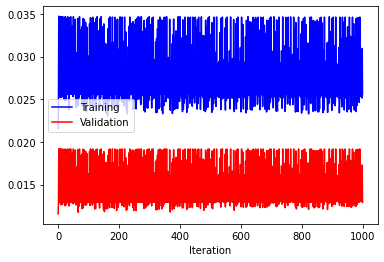

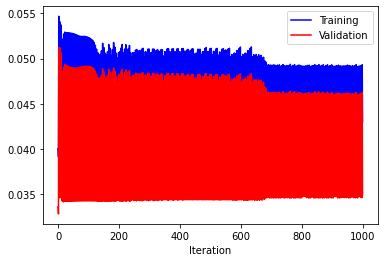





Learning Rate:  0.0001


confusion matrix BGD
2       3
3       43

ACCURACY SCORE BGD: 0.4025974025974026
PRECISION SCORE BGD:  0.4
RECALL SCORE BGD:   0.044444444444444446
F1 SCORE BGD:   0.08


confusion matrix SGD
5       4
4       42

ACCURACY SCORE SGD: 0.4025974025974026
PRECISION SCORE SGD:  0.5555555555555556
RECALL SCORE SGD:   0.10638297872340426
F1 SCORE SGD:   0.17857142857142858


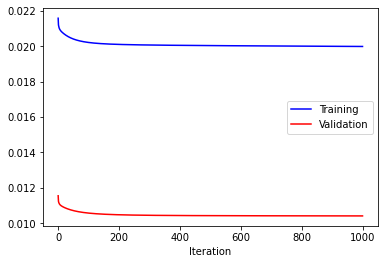

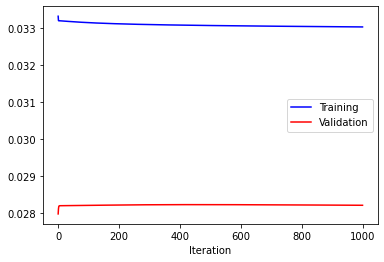





Learning Rate:  10


<ipython-input-33-bc7c37a35fb3>:23: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-tmpX))




confusion matrix BGD
31       40
40       6

ACCURACY SCORE BGD: 0.4025974025974026
PRECISION SCORE BGD:  0.43661971830985913
RECALL SCORE BGD:   0.8378378378378378
F1 SCORE BGD:   0.5740740740740741


confusion matrix SGD
30       38
38       8

ACCURACY SCORE SGD: 0.4025974025974026
PRECISION SCORE SGD:  0.4411764705882353
RECALL SCORE SGD:   0.7894736842105263
F1 SCORE SGD:   0.5660377358490566


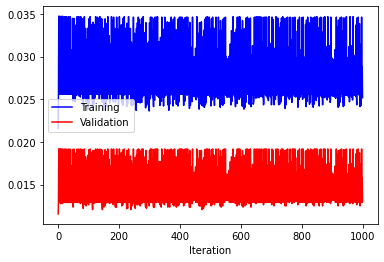

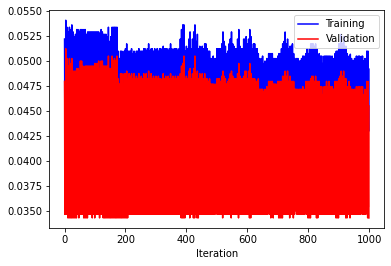

In [38]:
# Reading Data and seperating out input and outputs
def readDataset(filename):
  df = pd.read_csv(filename)
  y = list(df['Outcome'])
  x_labels = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
  df = df[x_labels]
  x = []
  for ind,row in df.iterrows():
    x.append(list(row))
  return x, y

# 7:2:1 split
def divideDataset(dataset):
  split = np.split(dataset,[int(0.7*len(dataset)), int(0.9*len(dataset))])
  return split[0],split[1],split[2]

# Calling all relevent functions
def computeResults(datasetInput):
  x,y  = readDataset(datasetInput)
  x_train,x_validate,x_test = divideDataset(x)
  y_train,y_validate,y_test = divideDataset(y)

  myEvaluation = Evaluation()

  learning_rate = [0.01, 0.0001, 10]

  for val in learning_rate:
    print("Learning Rate:  "+str(val))


    model = MyLogistechRegression(x_train,y_train,x_validate,y_validate,val,1000)

    y_training_loss_bgd, y_validation_loss_bgd = model.bgdFitting()
    bgd_predicted_values = list(model.predict(x_test))
    
    y_training_loss_sgd, y_validation_loss_sgd = model.sgdFitting(200)
    sgd_predicted_values = list(model.predict(x_test))

    true_positive_bgd, true_negatives_bgd, false_positives_bgd, false_negative_bgd = myEvaluation.confusionMatrix(list(y_test), bgd_predicted_values)
    accuracy_bgd = myEvaluation.accuracyScore(true_positive_bgd, true_negatives_bgd, false_positives_bgd, false_negative_bgd)
    precision_bgd = myEvaluation.precisionScore(true_positive_bgd, true_negatives_bgd, false_positives_bgd, false_negative_bgd)
    recall_bgd = myEvaluation.recallScore(true_positive_bgd, true_negatives_bgd, false_positives_bgd, false_negative_bgd)
    f1_bgd = myEvaluation.F1Score(true_positive_bgd, true_negatives_bgd, false_positives_bgd, false_negative_bgd)

    true_positive_sgd, true_negatives_sgd, false_positives_sgd, false_negative_sgd = myEvaluation.confusionMatrix(list(y_test), sgd_predicted_values)
    accuracy_sgd = myEvaluation.accuracyScore(true_positive_sgd, true_negatives_sgd, false_positives_sgd, false_negative_sgd)
    precision_sgd = myEvaluation.precisionScore(true_positive_sgd, true_negatives_sgd, false_positives_sgd, false_negative_sgd)
    recall_sgd = myEvaluation.recallScore(true_positive_sgd, true_negatives_sgd, false_positives_sgd, false_negative_sgd)
    f1_sgd = myEvaluation.F1Score(true_positive_sgd, true_negatives_sgd, false_positives_sgd, false_negative_sgd)

    print()
    print()
    print("confusion matrix BGD")
    print(str(true_positive_bgd) +"       "+str(false_positives_bgd))
    print(str(false_positives_bgd)+"       "+str(false_negative_bgd))
    print()
    print("ACCURACY SCORE BGD: "+str(accuracy_bgd))
    print("PRECISION SCORE BGD:  "+str(precision_bgd))
    print("RECALL SCORE BGD:   "+str(recall_bgd))
    print("F1 SCORE BGD:   "+str(f1_bgd))
    print()
    print()
    print("confusion matrix SGD")
    print(str(true_positive_sgd) +"       "+str(false_positives_sgd))
    print(str(false_positives_sgd)+"       "+str(false_negative_sgd))
    print()
    print("ACCURACY SCORE SGD: "+str(accuracy_sgd))
    print("PRECISION SCORE SGD:  "+str(precision_sgd))
    print("RECALL SCORE SGD:   "+str(recall_sgd))
    print("F1 SCORE SGD:   "+str(f1_sgd))
    myEvaluation.iterationVsLossGraph('BGD',1000,y_training_loss_bgd,y_validation_loss_bgd)
    myEvaluation.iterationVsLossGraph('SGD',1000,y_training_loss_sgd,y_validation_loss_sgd)
    print()
    print()
    print()
    print()
  
computeResults("C:\\Users\\Keshav Gambhir\\Desktop\\Assignment-1\\Datasets\\diabetes2.csv")

In [ ]:
def compareSklearnResults(datasetInput):
  x,y  = readDataset(datasetInput)
  x_train,x_validate,x_test = divideDataset(x)
  y_train,y_validate,y_test = divideDataset(y)

  iterations = [10, 20, 30, 40, 50, 100, 400, 700, 800, 1000, 2000, 5000]
  for val in iterations:
    model2 = MyLogistechRegression(x_train,y_train,x_validate,y_validate,0.0001,val)
    sklearnLogisticRegression = LogisticRegression(max_iter=val)
    model2.bgdFitting()
    myPrediction = model2.predict(x_test)
    
    sklearnLogisticRegression.fit(x_train,y_train)
    

    